# DateTime in Pandas
<hr style="border:2px solid black">

## Introduction

* Pandas was developed for financial modelling (Wes Mckinney, AQR Capital)
* Time series analysis therefore comprises an integral part of the package
* We're going to look at three different concepts in Pandas
    - 1) Timestamps
    - 2) Timedeltas
    - 3) Periods

In [68]:
# relevant packages
import pandas as pd
from datetime import datetime

## 1. Timestamp objects
* Pandas has inbuilt TimeStamp objects
* An array of TimeStamp objects are a DateTimeIndex
* The datatype of a TimeStamp object is datetime64
* There are two main methods of creating Timestamps or a DateTimeIndex:
    - 1) `pd.to_datetime()`
    - 2) `pd.date_range()`

### 1.1 [`pd.to_datetime()`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)

- You can use a lot of different formats to convert a string into a Timestamp

In [69]:
pd.to_datetime('2019 july 23') 

Timestamp('2019-07-23 00:00:00')

In [70]:
pd.to_datetime('2019-07-23')

Timestamp('2019-07-23 00:00:00')

In [71]:
pd.to_datetime('2019.07.23')

Timestamp('2019-07-23 00:00:00')

In [72]:
type(pd.to_datetime('230719-00:10:00'))

pandas._libs.tslibs.timestamps.Timestamp

In [73]:
pd.to_datetime('230719-00:10:00')

Timestamp('2019-07-23 00:10:00')

In [74]:
# notice how the default timestamp assigned is midnight 00:00:00

pd.to_datetime('19/07/2023', infer_datetime_format=True)

Timestamp('2023-07-19 00:00:00')

In [75]:
# we can 'change' the time zone from the default UTC

pd.to_datetime('19/7/2023-05:00:00', utc=True, infer_datetime_format=True).tz_convert('US/Eastern')

Timestamp('2023-07-19 01:00:00-0400', tz='US/Eastern')

In [76]:
dates = ['19/07/2023', '20/07/2023']
dates = pd.to_datetime(dates, infer_datetime_format=True)
dates

DatetimeIndex(['2023-07-19', '2023-07-20'], dtype='datetime64[ns]', freq=None)

You could also pass a pd.Series or a pd.DataFrame into `pd.to_datetime()` if the values are convertable to a Timestamp.

### 1.2 [`pd.date_range()`](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)

What happens if you want to create a range of dates?
You can use `pd.date_range()` to create a DateTimeIndex (array of Timestamps):

In [77]:
date_range = pd.date_range('jan 1 2019', '31 dec 2019', freq = '12h')

In [78]:
date_range

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 12:00:00',
               '2019-01-02 00:00:00', '2019-01-02 12:00:00',
               '2019-01-03 00:00:00', '2019-01-03 12:00:00',
               '2019-01-04 00:00:00', '2019-01-04 12:00:00',
               '2019-01-05 00:00:00', '2019-01-05 12:00:00',
               ...
               '2019-12-26 12:00:00', '2019-12-27 00:00:00',
               '2019-12-27 12:00:00', '2019-12-28 00:00:00',
               '2019-12-28 12:00:00', '2019-12-29 00:00:00',
               '2019-12-29 12:00:00', '2019-12-30 00:00:00',
               '2019-12-30 12:00:00', '2019-12-31 00:00:00'],
              dtype='datetime64[ns]', length=729, freq='12H')

#### This is all nice and fine, but why do we care?

The reason we care for Timestamps in pandas is because they allow us to perform time related actions on the data.
Several things you can do with a timestamp:

- extract the hour
- extract the day
- extract the month
- extract the year
- Slice a DataFrame or Series if the DateTimeIndex is the Index of the DataFrame
- calculate time differences
- calculate time-dependent statistics and analyses

In [79]:
first_day = date_range[0]

In [80]:
first_day

Timestamp('2019-01-01 00:00:00', freq='12H')

In [81]:
first_day.hour, first_day.day, first_day.year, first_day.month_name()

(0, 1, 2019, 'January')

How could that be useful?
Let us look at the data for this week and think about what we could do with this functionality:

- Extract weekdays from the Timestamp
- Extract the hour of the day from the Timestamp
- Create subsets of the data
- ...

In [136]:
data_train=pd.read_csv('../data/stock_px.csv')
data_train

,Unnamed: 0,AAPL,MSFT,XOM,SPX
0,2003-01-02 00:00:00,7.40,21.11,29.22,909.03
1,2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2,2003-01-06 00:00:00,7.45,21.52,29.96,929.01
3,2003-01-07 00:00:00,7.43,21.93,28.95,922.93
4,2003-01-08 00:00:00,7.28,21.31,28.83,909.93
...,...,...,...,...,...
2209,2011-10-10 00:00:00,388.81,26.94,76.28,1194.89
2210,2011-10-11 00:00:00,400.29,27.00,76.27,1195.54
2211,2011-10-12 00:00:00,402.19,26.96,77.16,1207.25
2212,2011-10-13 00:00:00,408.43,27.18,76.37,1203.66


In [137]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2214 entries, 0 to 2213
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2214 non-null   object 
 1   AAPL        2214 non-null   float64
 2   MSFT        2214 non-null   float64
 3   XOM         2214 non-null   float64
 4   SPX         2214 non-null   float64
dtypes: float64(4), object(1)
memory usage: 86.6+ KB


In [141]:
df = pd.read_csv('../data/stock_px.csv', index_col=0, parse_dates=True)
df.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [144]:
# only works for datetime index
df.index.resolution

'day'

In [146]:
df.loc['2003-01-01 01:00':'2004-01-01 04:00']

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2003-12-24,10.20,21.44,33.73,1094.04
2003-12-26,10.39,21.57,33.91,1095.89
2003-12-29,10.57,21.77,34.36,1109.48
2003-12-30,10.64,21.82,34.45,1109.64


### 1.3 `df.between_time()`

In [148]:
df.between_time

<bound method NDFrame.between_time of               AAPL   MSFT    XOM      SPX
2003-01-02    7.40  21.11  29.22   909.03
2003-01-03    7.45  21.14  29.24   908.59
2003-01-06    7.45  21.52  29.96   929.01
2003-01-07    7.43  21.93  28.95   922.93
2003-01-08    7.28  21.31  28.83   909.93
...            ...    ...    ...      ...
2011-10-10  388.81  26.94  76.28  1194.89
2011-10-11  400.29  27.00  76.27  1195.54
2011-10-12  402.19  26.96  77.16  1207.25
2011-10-13  408.43  27.18  76.37  1203.66
2011-10-14  422.00  27.27  78.11  1224.58

[2214 rows x 4 columns]>

In [150]:
df.index[1]

Timestamp('2003-01-03 00:00:00')

In [154]:
df.index.is_monotonic_increasing

True

<hr style="border:2px solid black">

## 2. Timedelta objects

Pandas has inbuilt Timedelta objects
* An array of Timedelta objects is a TimedeltaIndex
* The datatype of a TimeStamp object is timedelta64
* There are three methods of creating Timedeltas or a TimedeltaIndex:
    - 1) [`pd.to_timedelta()`](https://pandas.pydata.org/docs/reference/api/pandas.to_timedelta.html)
    - 2) [`pd.timedelta_range()`](https://pandas.pydata.org/docs/reference/api/pandas.timedelta_range.html)
    - 3) Subtract two pd.Timestamp objects

In [158]:
df.index.max()-df.index.min()

Timedelta('3207 days 00:00:00')

In [167]:
date_range = pd.date_range(end='1/1/2018', periods=8)
date_range

DatetimeIndex(['2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30', '2017-12-31', '2018-01-01'],
              dtype='datetime64[ns]', freq='D')

In [168]:
delta = date_range[1] - date_range[0]
delta

Timedelta('1 days 00:00:00')

In [169]:
delta.seconds

0

In [170]:
df.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
           dtype='int64', length=2214)

In [171]:
df.index.year

Int64Index([2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003,
            ...
            2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011],
           dtype='int64', length=2214)

In [172]:
df.index.max()

Timestamp('2011-10-14 00:00:00')

In [173]:
df.index.min()

Timestamp('2003-01-02 00:00:00')

In [174]:
df.index.max() - df.index.min()

Timedelta('3207 days 00:00:00')

In [176]:
#df.index = df.index.tz_localize('UTC')

TypeError: Already tz-aware, use tz_convert to convert.

In [177]:
df.index

DatetimeIndex(['2003-01-02 00:00:00+00:00', '2003-01-03 00:00:00+00:00',
               '2003-01-06 00:00:00+00:00', '2003-01-07 00:00:00+00:00',
               '2003-01-08 00:00:00+00:00', '2003-01-09 00:00:00+00:00',
               '2003-01-10 00:00:00+00:00', '2003-01-13 00:00:00+00:00',
               '2003-01-14 00:00:00+00:00', '2003-01-15 00:00:00+00:00',
               ...
               '2011-10-03 00:00:00+00:00', '2011-10-04 00:00:00+00:00',
               '2011-10-05 00:00:00+00:00', '2011-10-06 00:00:00+00:00',
               '2011-10-07 00:00:00+00:00', '2011-10-10 00:00:00+00:00',
               '2011-10-11 00:00:00+00:00', '2011-10-12 00:00:00+00:00',
               '2011-10-13 00:00:00+00:00', '2011-10-14 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=2214, freq=None)

In [178]:
df.index = df.index.tz_convert('US/Eastern')

In [179]:
df.index

DatetimeIndex(['2003-01-01 19:00:00-05:00', '2003-01-02 19:00:00-05:00',
               '2003-01-05 19:00:00-05:00', '2003-01-06 19:00:00-05:00',
               '2003-01-07 19:00:00-05:00', '2003-01-08 19:00:00-05:00',
               '2003-01-09 19:00:00-05:00', '2003-01-12 19:00:00-05:00',
               '2003-01-13 19:00:00-05:00', '2003-01-14 19:00:00-05:00',
               ...
               '2011-10-02 20:00:00-04:00', '2011-10-03 20:00:00-04:00',
               '2011-10-04 20:00:00-04:00', '2011-10-05 20:00:00-04:00',
               '2011-10-06 20:00:00-04:00', '2011-10-09 20:00:00-04:00',
               '2011-10-10 20:00:00-04:00', '2011-10-11 20:00:00-04:00',
               '2011-10-12 20:00:00-04:00', '2011-10-13 20:00:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', length=2214, freq=None)

In [180]:
df.index = df.index.tz_convert('Europe/Berlin')

In [181]:
df.index

DatetimeIndex(['2003-01-02 01:00:00+01:00', '2003-01-03 01:00:00+01:00',
               '2003-01-06 01:00:00+01:00', '2003-01-07 01:00:00+01:00',
               '2003-01-08 01:00:00+01:00', '2003-01-09 01:00:00+01:00',
               '2003-01-10 01:00:00+01:00', '2003-01-13 01:00:00+01:00',
               '2003-01-14 01:00:00+01:00', '2003-01-15 01:00:00+01:00',
               ...
               '2011-10-03 02:00:00+02:00', '2011-10-04 02:00:00+02:00',
               '2011-10-05 02:00:00+02:00', '2011-10-06 02:00:00+02:00',
               '2011-10-07 02:00:00+02:00', '2011-10-10 02:00:00+02:00',
               '2011-10-11 02:00:00+02:00', '2011-10-12 02:00:00+02:00',
               '2011-10-13 02:00:00+02:00', '2011-10-14 02:00:00+02:00'],
              dtype='datetime64[ns, Europe/Berlin]', length=2214, freq=None)

In [182]:
# default freq is D: days

period_range = pd.period_range('2019 10 01', '2019 11 01')

In [183]:
period_range

PeriodIndex(['2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04',
             '2019-10-05', '2019-10-06', '2019-10-07', '2019-10-08',
             '2019-10-09', '2019-10-10', '2019-10-11', '2019-10-12',
             '2019-10-13', '2019-10-14', '2019-10-15', '2019-10-16',
             '2019-10-17', '2019-10-18', '2019-10-19', '2019-10-20',
             '2019-10-21', '2019-10-22', '2019-10-23', '2019-10-24',
             '2019-10-25', '2019-10-26', '2019-10-27', '2019-10-28',
             '2019-10-29', '2019-10-30', '2019-10-31', '2019-11-01'],
            dtype='period[D]')

In [184]:
period_range = pd.period_range('2019 10 01', '2020 10 01', freq='M')

period_range

PeriodIndex(['2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03',
             '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09',
             '2020-10'],
            dtype='period[M]')

In [185]:
type(period_range[0])

pandas._libs.tslibs.period.Period

<hr style="border:2px solid black">

## 3. Other concepts: `resample()`, `shift()` and `rolling()`

In [186]:
#df = pd.read_csv('bike_train.csv', index_col=0, parse_dates=True)
df.head()

,AAPL,MSFT,XOM,SPX
2003-01-02 01:00:00+01:00,7.40,21.11,29.22,909.03
2003-01-03 01:00:00+01:00,7.45,21.14,29.24,908.59
2003-01-06 01:00:00+01:00,7.45,21.52,29.96,929.01
2003-01-07 01:00:00+01:00,7.43,21.93,28.95,922.93
2003-01-08 01:00:00+01:00,7.28,21.31,28.83,909.93


In [194]:
# let's take the first month of the bike data, all data in Januray 2011

january_2011_df = df['2011-01-01':'2011-01-19']
df.info

<bound method DataFrame.info of                              AAPL   MSFT    XOM      SPX
2003-01-02 01:00:00+01:00    7.40  21.11  29.22   909.03
2003-01-03 01:00:00+01:00    7.45  21.14  29.24   908.59
2003-01-06 01:00:00+01:00    7.45  21.52  29.96   929.01
2003-01-07 01:00:00+01:00    7.43  21.93  28.95   922.93
2003-01-08 01:00:00+01:00    7.28  21.31  28.83   909.93
...                           ...    ...    ...      ...
2011-10-10 02:00:00+02:00  388.81  26.94  76.28  1194.89
2011-10-11 02:00:00+02:00  400.29  27.00  76.27  1195.54
2011-10-12 02:00:00+02:00  402.19  26.96  77.16  1207.25
2011-10-13 02:00:00+02:00  408.43  27.18  76.37  1203.66
2011-10-14 02:00:00+02:00  422.00  27.27  78.11  1224.58

[2214 rows x 4 columns]>

In [191]:
import matplotlib.pyplot as pl

/tmp/ipykernel_17327/1833039432.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2011'].plot(figsize=(15, 8));


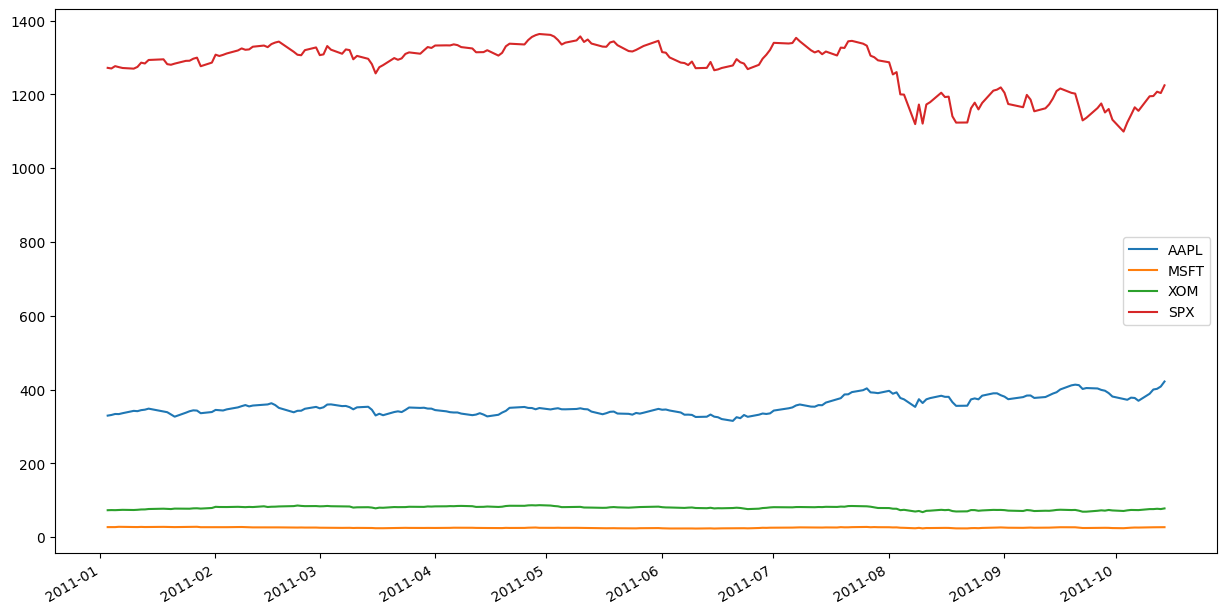

In [193]:
january_2011_df.shape
df['2011'].plot(figsize=(15, 8))

In [201]:
df_sum = df[['AAPL', 'MSFT', 'XOM', 'SPX']].resample('M').sum()
df_sum

,AAPL,MSFT,XOM,SPX
2003-01-31 00:00:00+01:00,152.02,435.59,595.48,18812.56
2003-02-28 00:00:00+01:00,139.34,356.94,531.72,15914.76
2003-03-31 00:00:00+02:00,153.28,407.30,610.37,17779.05
2003-04-30 00:00:00+02:00,145.40,417.30,610.06,18690.54
2003-05-31 00:00:00+02:00,186.59,418.88,624.30,19655.22
...,...,...,...,...
2011-06-30 00:00:00+02:00,7283.79,534.58,1746.05,28320.35
2011-07-31 00:00:00+02:00,7444.76,535.98,1643.93,26503.69
2011-08-31 00:00:00+02:00,8665.54,582.31,1680.35,27262.03
2011-09-30 00:00:00+02:00,8242.36,545.35,1520.39,24651.46


In [202]:
df_mean = df[['AAPL', 'MSFT', 'XOM', 'SPX']].resample('M').mean()

df_mean.head()

,AAPL,MSFT,XOM,SPX
2003-01-31 00:00:00+01:00,7.239048,20.742381,28.356190,895.836190
2003-02-28 00:00:00+01:00,7.333684,18.786316,27.985263,837.618947
2003-03-31 00:00:00+02:00,7.299048,19.395238,29.065238,846.621429
2003-04-30 00:00:00+02:00,6.923810,19.871429,29.050476,890.025714
2003-05-31 00:00:00+02:00,8.885238,19.946667,29.728571,935.962857


In [203]:
final_downsampled = pd.concat([df_mean, df_sum], axis=1)

final_downsampled

,AAPL,MSFT,XOM,SPX,AAPL,MSFT,XOM,SPX
2003-01-31 00:00:00+01:00,7.239048,20.742381,28.356190,895.836190,152.02,435.59,595.48,18812.56
2003-02-28 00:00:00+01:00,7.333684,18.786316,27.985263,837.618947,139.34,356.94,531.72,15914.76
2003-03-31 00:00:00+02:00,7.299048,19.395238,29.065238,846.621429,153.28,407.30,610.37,17779.05
2003-04-30 00:00:00+02:00,6.923810,19.871429,29.050476,890.025714,145.40,417.30,610.06,18690.54
2003-05-31 00:00:00+02:00,8.885238,19.946667,29.728571,935.962857,186.59,418.88,624.30,19655.22
...,...,...,...,...,...,...,...,...
2011-06-30 00:00:00+02:00,331.081364,24.299091,79.365909,1287.288636,7283.79,534.58,1746.05,28320.35
2011-07-31 00:00:00+02:00,372.238000,26.799000,82.196500,1325.184500,7444.76,535.98,1643.93,26503.69
2011-08-31 00:00:00+02:00,376.762609,25.317826,73.058696,1185.305652,8665.54,582.31,1680.35,27262.03
2011-09-30 00:00:00+02:00,392.493333,25.969048,72.399524,1173.879048,8242.36,545.35,1520.39,24651.46


In [204]:
upsampled = df_sum.resample('H').interpolate()
upsampled.head()

,AAPL,MSFT,XOM,SPX
2003-01-31 00:00:00+01:00,152.020000,435.590000,595.480000,18812.560000
2003-01-31 01:00:00+01:00,152.001131,435.472961,595.385119,18808.247798
2003-01-31 02:00:00+01:00,151.982262,435.355923,595.290238,18803.935595
2003-01-31 03:00:00+01:00,151.963393,435.238884,595.195357,18799.623393
2003-01-31 04:00:00+01:00,151.944524,435.121845,595.100476,18795.311190


In [119]:
upsampled.shape

(433, 3)

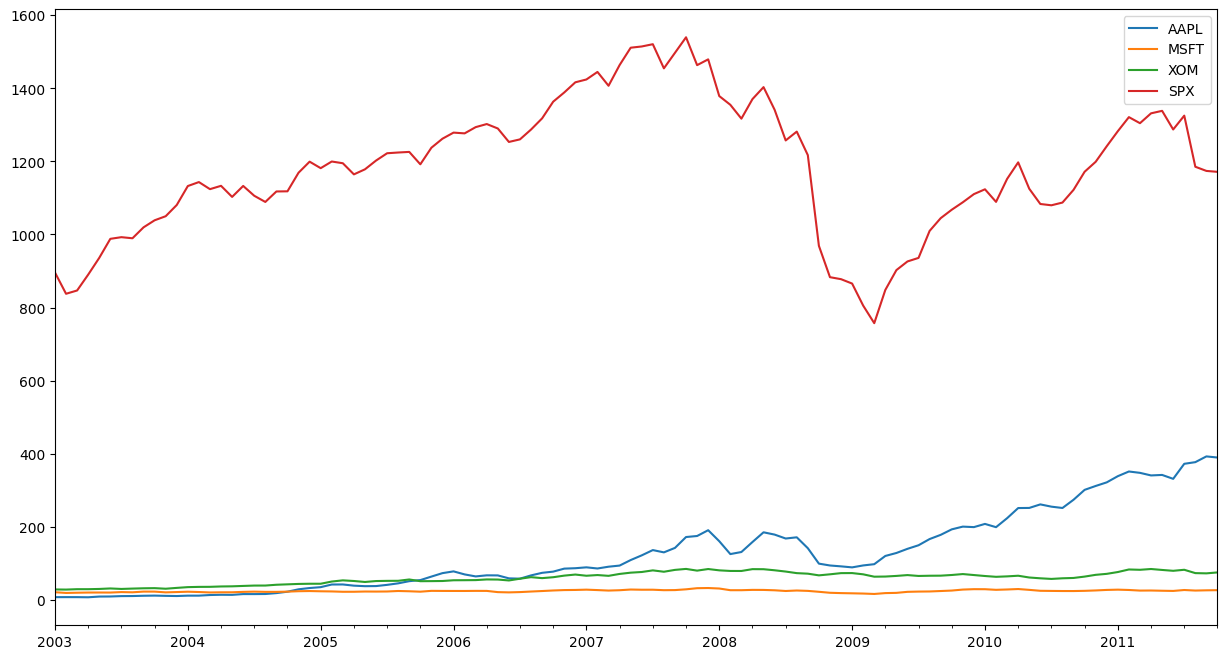

In [207]:
df_mean.plot(figsize=(15, 8));

<Axes: >

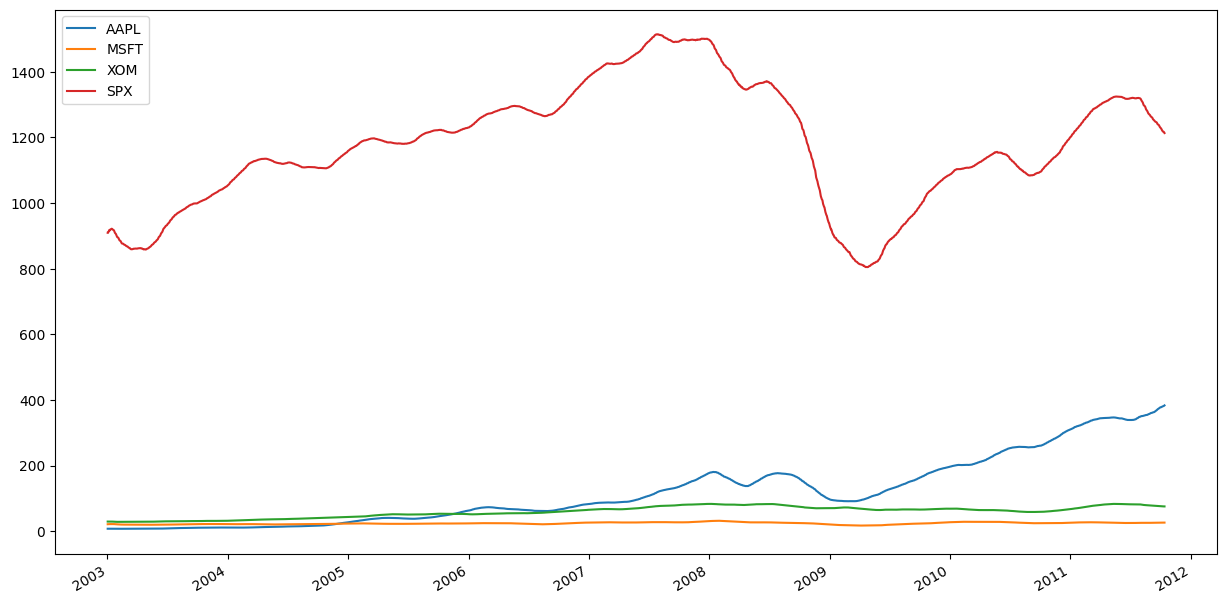

In [211]:
df.rolling('100D').mean().plot(figsize=(15, 8))